In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_images)

10000

데이터 전처리

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

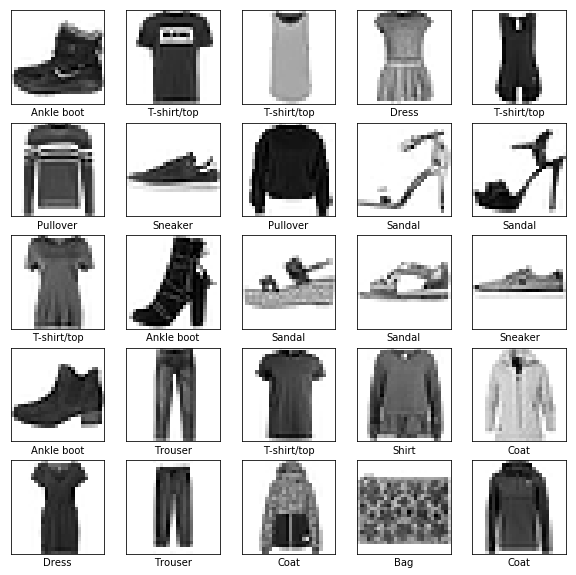

In [18]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력하기
# 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비 마침

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

모델 구성

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

모델 컴파일

In [20]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

모델 학습

In [21]:
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4994 - accuracy: 0.8242
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3772 - accuracy: 0.8639
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3378 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3132 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2954 - accuracy: 0.8905


모델 평가

In [24]:
model_loss, model_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("모델의 정확도: ", model_accuracy)

10000/1 - 0s - loss: 0.2562 - accuracy: 0.8754
모델의 정확도:  0.8754


예측하기

In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([2.0193115e-06, 5.7337783e-08, 1.3471175e-07, 3.3598411e-08,
       2.8662248e-07, 1.4099420e-02, 8.4628908e-07, 1.9064592e-02,
       3.7559799e-05, 9.6679503e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

10개 클래스에 대한 예측을 그래프로 표현

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


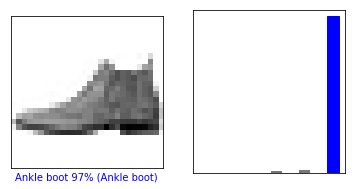

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

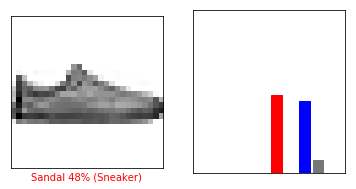

In [42]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

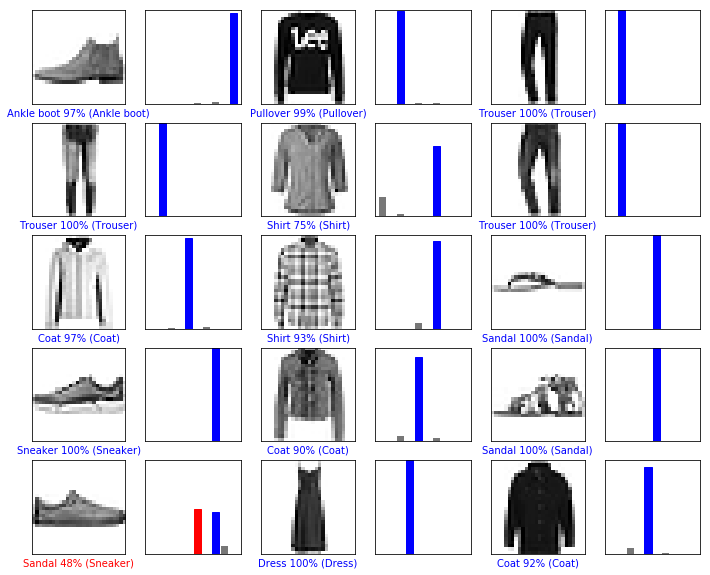

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [44]:
img = test_images[0]
print(img.shape)

(28, 28)


In [45]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.01930948e-06 5.73375623e-08 1.34711755e-07 3.35984112e-08
  2.86621940e-07 1.40994275e-02 8.46288231e-07 1.90645922e-02
  3.75597992e-05 9.66795027e-01]]


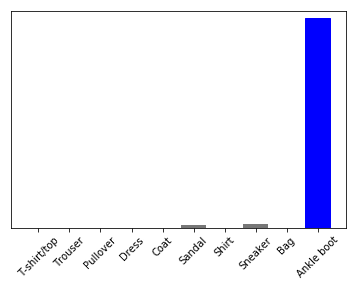

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

9